In [41]:
import matplotlib.pyplot as plt
import tensorflow as tf

In [69]:
w_true = 0.1
b_true = 0.5

In [70]:
def make_data(w=w_true, b=b_true, n =100):
    x = tf.random.uniform(shape=(n,))
    noise = tf.random.normal(shape=(len(x,),), mean=0.0, stddev=0.01)
    y = w*x + b + noise
    return x.numpy(), y.numpy()

In [47]:
x, y = make_data()

In [58]:
 def predict(x, w, b):
    y = w*x + b
    return y

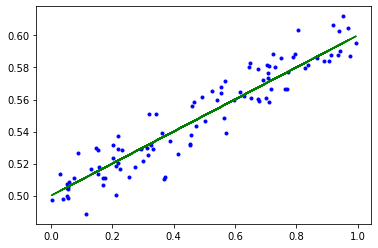

In [72]:
%matplotlib inline
plt.plot(x, y, 'b.')
plt.plot(x, predict(x, w_true, b_true), 'g')

In [85]:
def mse(y_hat, y):
    return tf.reduce_mean(tf.square(y_hat - y))

In [90]:
w_guess = tf.Variable(0.0)
b_guess = tf.Variable(0.0)

learning_rate = 0.05
steps = 200

for step in range(steps):
    with tf.GradientTape() as tape:
        y_hat = predict(x, w_guess, b_guess)
        loss = mse(y_hat, y)
        
        grads = tape.gradient(loss, [w_guess, b_guess])
        w_guess.assign_sub(grads[0]*learning_rate)
        b_guess.assign_sub(grads[1]*learning_rate)
        
        if step % 20 == 0:
            print("Step {} loss {}".format(step, loss))            
        

Step 0 loss 0.30149975419044495
Step 20 loss 0.002515257801860571
Step 40 loss 0.0008293729042634368
Step 60 loss 0.0006530657992698252
Step 80 loss 0.0005238668527454138
Step 100 loss 0.0004252230282872915
Step 120 loss 0.00034988782135769725
Step 140 loss 0.00029235382680781186
Step 160 loss 0.0002484145516064018
Step 180 loss 0.00021485780598595738


In [91]:
print(w_guess.numpy())
print(b_guess.numpy())

0.13487113
0.48263526


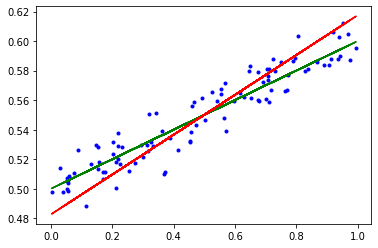

In [92]:
%matplotlib inline
plt.plot(x, y, 'b.')
plt.plot(x, predict(x, w_true, b_true), 'g')
plt.plot(x, predict(x, w_guess, b_guess), 'r')